In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load image

In [33]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  return img

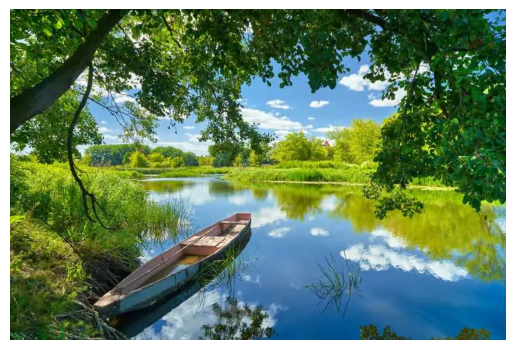

In [34]:
filename = "img.webp"
img = read_file(filename)

org_img = img.copy()

Create Edge Mask

In [35]:
def edge_mask(img, line_size, blur_value):
  """
  input:Input Scale Image
  output:Edges of Image
  """
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

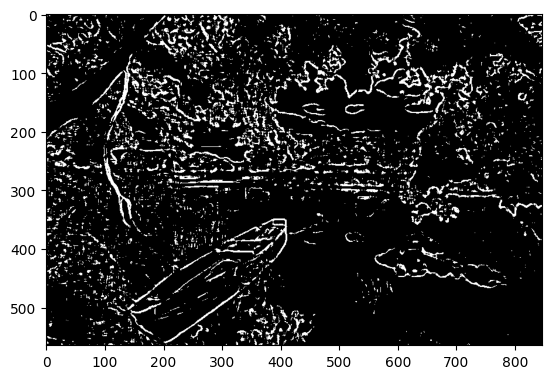

In [36]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap="binary")
plt.show()

Reduce the Color Palette

In [37]:
def color_quantization(img, k):
  #Transform the image
  data = np.float32(img).reshape((-1, 3))

  #Determine Criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

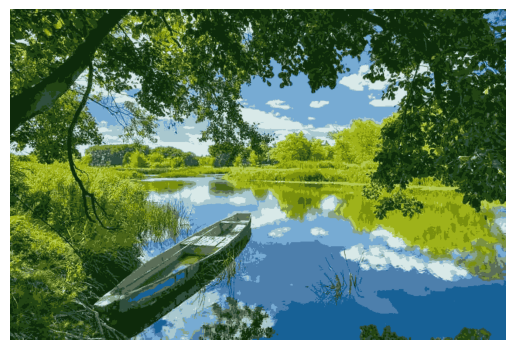

In [38]:
img = color_quantization(img, k=15)
plt.imshow(img)
plt.axis("off")
plt.show()

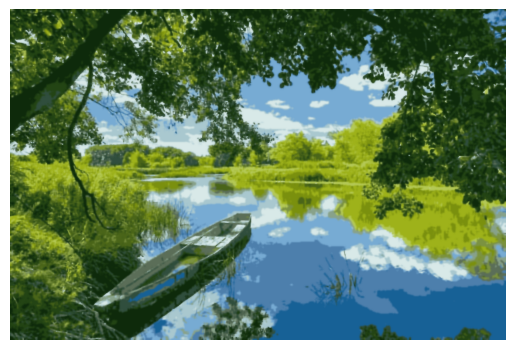

In [39]:
# Reduce the noise
blurred = cv2.bilateralFilter(img, d=5, sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.axis("off")
plt.show()

Combine Edge Mask with the quantize img

In [40]:
def cartoon():
  c = cv2.bitwise_and(blurred, blurred, mask=edges)
  plt.imshow(c)
  plt.title("Cartoon Image")
  plt.axis("off")
  plt.show()

  plt.imshow(org_img)
  plt.title("Original Image")
  plt.axis("off")
  plt.show()

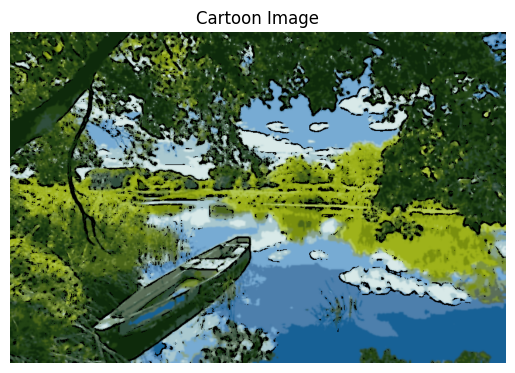

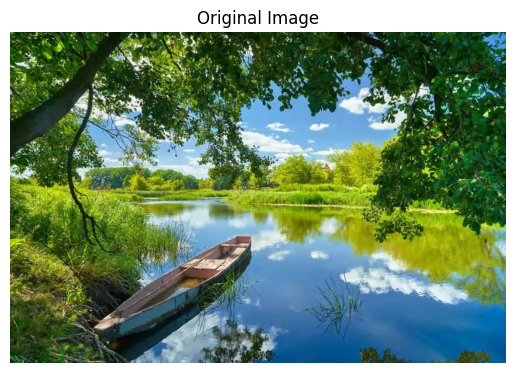

In [41]:
cartoon()